In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
start = '2010-01-01'
end = date.today().strftime("%Y-%m-%d")

df = data.DataReader('RUCHI.NS','yahoo',start,end)
df.head()

NameError: name 'date' is not defined

In [4]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-04-05,932.400024,866.849976,930.0,875.400024,2479616.0,875.400024
2022-04-06,815.000000,714.500000,714.5,755.250000,13181107.0,755.250000
2022-04-07,839.900024,770.000000,770.0,817.700012,12081878.0,817.700012
2022-04-08,938.700012,825.750000,855.0,923.450012,40371923.0,923.450012
2022-04-11,969.000000,969.000000,969.0,969.000000,40372023.0,969.000000


In [5]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-01-04,9370.0,8935.0,9370.0,9005.0,8051.0,8725.292969
1,2010-01-05,9210.0,8885.0,9005.0,8915.0,11448.0,8638.088867
2,2010-01-06,9545.0,8880.0,8990.0,9440.0,41703.0,9146.783203
3,2010-01-07,9670.0,9340.0,9600.0,9445.0,23390.0,9151.625977
4,2010-01-08,9530.0,9300.0,9530.0,9370.0,5945.0,9078.956055


In [6]:
df = df.drop(['Date','Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,9370.0,8935.0,9370.0,9005.0,8051.0
1,9210.0,8885.0,9005.0,8915.0,11448.0
2,9545.0,8880.0,8990.0,9440.0,41703.0
3,9670.0,9340.0,9600.0,9445.0,23390.0
4,9530.0,9300.0,9530.0,9370.0,5945.0


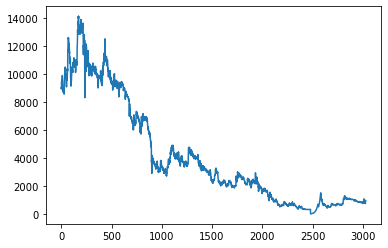

In [7]:
plt.plot(df.Close)

In [8]:
df

,High,Low,Open,Close,Volume
0,9370.000000,8935.000000,9370.0,9005.000000,8051.0
1,9210.000000,8885.000000,9005.0,8915.000000,11448.0
2,9545.000000,8880.000000,8990.0,9440.000000,41703.0
3,9670.000000,9340.000000,9600.0,9445.000000,23390.0
4,9530.000000,9300.000000,9530.0,9370.000000,5945.0
...,...,...,...,...,...
3024,932.400024,866.849976,930.0,875.400024,2479616.0
3025,815.000000,714.500000,714.5,755.250000,13181107.0
3026,839.900024,770.000000,770.0,817.700012,12081878.0
3027,938.700012,825.750000,855.0,923.450012,40371923.0


In [9]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3024    882.7540
3025    880.0440
3026    878.1515
3027    877.5960
3028    877.1060
Name: Close, Length: 3029, dtype: float64

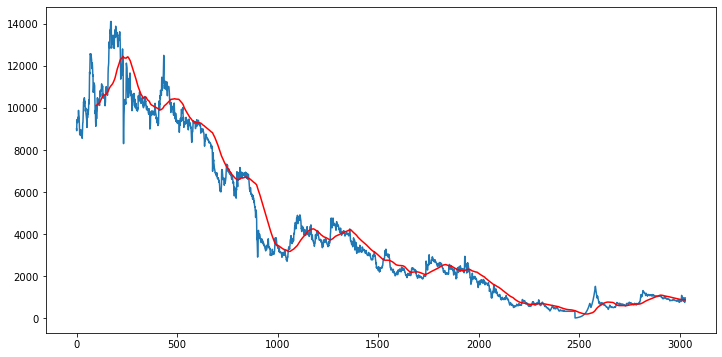

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [11]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3024    975.400500
3025    973.129250
3026    971.192750
3027    969.889749
3028    968.836999
Name: Close, Length: 3029, dtype: float64

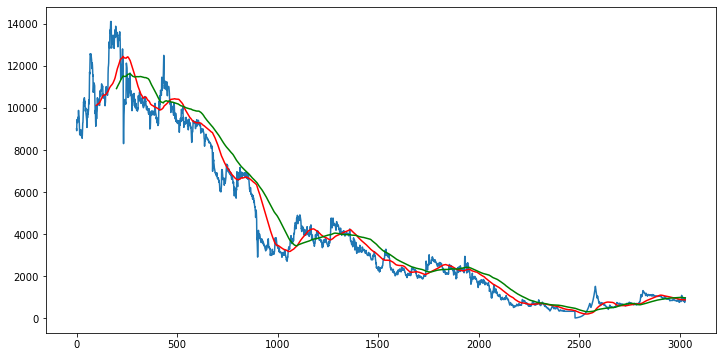

In [12]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [13]:
df.shape

(3029, 5)

In [14]:
#Split Data into Training and Testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(2120, 1)
(909, 1)


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.61436673],
       [0.60756144],
       [0.64725898],
       ...,
       [0.00642722],
       [0.00907372],
       [0.00529301]])

In [17]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train,y_train = np.array(x_train), np.array(y_train)

In [18]:
x_train.shape

(2020, 100, 1)

In [19]:
# ML Model

In [20]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [21]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [23]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
64/64 [==============================] - 17s 221ms/step - loss: 0.0342
Epoch 2/50
64/64 [==============================] - 13s 200ms/step - loss: 0.0075
Epoch 3/50
64/64 [==============================] - 13s 197ms/step - loss: 0.0063
Epoch 4/50
64/64 [==============================] - 12s 195ms/step - loss: 0.0056
Epoch 5/50
64/64 [==============================] - 13s 196ms/step - loss: 0.0049
Epoch 6/50
64/64 [==============================] - 13s 197ms/step - loss: 0.0050
Epoch 7/50
64/64 [==============================] - 12s 186ms/step - loss: 0.0055
Epoch 8/50
64/64 [==============================] - 12s 184ms/step - loss: 0.0051
Epoch 9/50
64/64 [==============================] - 12s 188ms/step - loss: 0.0052
Epoch 10/50
64/64 [==============================] - 13s 210ms/step - loss: 0.0048
Epoch 11/50
64/64 [==============================] - 12s 189ms/step - loss: 0.0040
Epoch 12/50
64/64 [==============================] - 12s 190ms/step - loss: 0.0039
Epoch 13/50
6

In [24]:
model.save('keras_model.h5')

In [25]:
data_testing.head()

,Close
2120,905.0
2121,940.0
2122,935.0
2123,900.0
2124,905.0


In [26]:
past_100 = data_training.tail(100)

In [27]:
final_df = past_100.append(data_testing, ignore_index = True)

In [28]:
input_data = scaler.fit_transform(final_df)

In [29]:
input_data.shape

(1009, 1)

In [73]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [74]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(909, 100, 1)
(909,)


In [75]:
import tensorflow as tf

In [76]:
# Make predictions

y_predicted = model.predict(x_test)

In [77]:
scale = scaler.scale_

In [78]:
scale_factor = 1/scale[0]
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

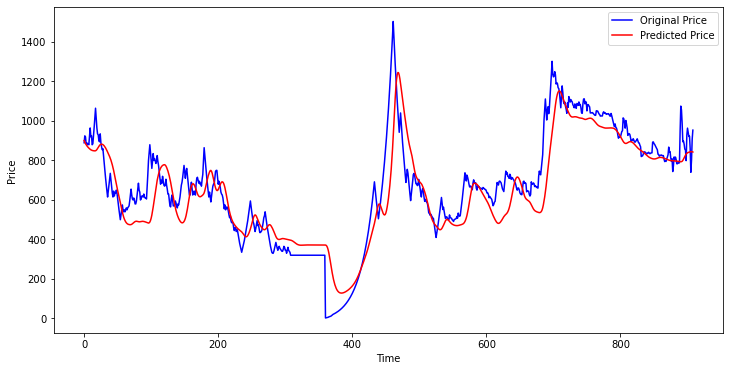

In [79]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()